rename this repo

# An atlas of healthy and injured cell states and niches in the human kidney [scCv3]
GEO: [GSE183276](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE183276)

In [2]:
suppressPackageStartupMessages({
    library(Seurat)
    library(celldex)
    library(ShinyCell)
    library(dplyr)
    library(SingleR)
    library(dplyr)
    library(tibble)
})

In [40]:
# Download count matrix
options(timeout = max(3000, getOption("timeout")))
options(download.file.method.GEOquery = "wget")
url <- "https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE183276&format=file&file=GSE183276%5FKidney%5FHealthy%2DInjury%5FCell%5FAtlas%5FscCv3%5FCounts%5F03282022%2ERDS%2Egz"
curl_command <- paste("curl -o data/GSE183276_Kidney_Healthy-Injury_Cell_Atlas_scCv3_Counts_03282022.RDS.gz", shQuote(url))
system(curl_command)

In [ ]:
# Read in matrix RDS
path <- "data/GSE183276_Kidney_Healthy-Injury_Cell_Atlas_scCv3_Counts_03282022.RDS.gz"
gunzip(path, remove = FALSE, overwrite = TRUE)
matrix <- readRDS(str_remove(path, ".gz"))
file.remove(str_remove(path, ".gz"))

In [ ]:
# Download metadata
# URL of the gzipped text file
path <- "https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE183276&format=file&file=GSE183276%5FKidney%5FHealthy%2DInjury%5FCell%5FAtlas%5FscCv3%5FMetadata%5F03282022%2Etxt%2Egz"
temp_file <- tempfile()
download.file(path, temp_file, mode = "wb")
metadata <- read.table(gzfile(temp_file))

In [57]:
# Create Seurat
obj <- CreateSeuratObject(counts = matrix, meta.data = metadata,  min.cells = 3, min.features = 300)
obj
save(obj, file = file.path("object", "00.rda"))

An object of class Seurat 
29447 features across 109741 samples within 1 assay 
Active assay: RNA (29447 features, 0 variable features)
 1 layer present: counts

In [58]:
# Clean up data
obj[["percent.mt"]] <- PercentageFeatureSet(object = obj, pattern = "^MT-")
obj <- subset(obj, subset = nFeature_RNA > 350 & nFeature_RNA < 5000 & percent.mt < 10)
obj
save(obj, file = file.path("object", "01.rda"))

An object of class Seurat 
29447 features across 19875 samples within 1 assay 
Active assay: RNA (29447 features, 0 variable features)
 1 layer present: counts

In [59]:
# Normalize
obj <- SCTransform(obj, ncells = 3000,  variable.features.n = 2000, vst.flavor="v2", method = 'glmGamPoi', conserve.memory = TRUE)
save(obj, file=file.path("object", "02.rda"))

Running SCTransform on assay: RNA

Running SCTransform on layer: counts

vst.flavor='v2' set. Using model with fixed slope and excluding poisson genes.

Variance stabilizing transformation of count matrix of size 24774 by 19875

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 3000 cells

There are 22 estimated thetas smaller than 1e-07 - will be set to 1e-07

Found 18 outliers - those will be ignored in fitting/regularization step


Skip calculation of full residual matrix

Will not return corrected UMI because residual type is not set to 'pearson'

Calculating gene attributes

Wall clock passed: Time difference of 9.912645 secs

Setting min_variance based on median UMI:  0.0397700155805492

Calculating variance for residuals of type pearson for 24774 genes

Determine variable features

Setting min_variance based on median UMI:  0.159719087525662

Calculating residuals of type pearson for 2000 genes



  |======================================================================| 100%


Computing corrected UMI count matrix

Centering data matrix

Getting residuals for block 1(of 7) for counts dataset

Getting residuals for block 2(of 7) for counts dataset

Getting residuals for block 3(of 7) for counts dataset

Getting residuals for block 4(of 7) for counts dataset

Getting residuals for block 5(of 7) for counts dataset

Getting residuals for block 6(of 7) for counts dataset

Getting residuals for block 7(of 7) for counts dataset

Centering data matrix

Finished calculating residuals for counts

Set default assay to SCT



In [61]:
obj <- RunPCA(obj, npcs = 30, verbose = TRUE)
obj <- RunUMAP(obj, reduction = "pca", dims = 1:20)
obj <- FindNeighbors(obj, reduction = "pca", dims = 1:20)
obj <- FindClusters(obj, resolution = 0.5)
save(obj, file=file.path("object", "03.rda"))

PC_ 1 
Positive:  HLA-DRA, LYZ, HLA-DRB1, HLA-DPA1, HLA-DPB1, CD74, TMSB4X, TYROBP, S100A4, AIF1 
	   HLA-DQA1, FCER1G, HLA-DQB1, CST3, C1QA, LST1, S100A9, B2M, C1QB, CCL3 
	   CCL4, HLA-DRB5, NKG7, LGALS1, HCST, FOS, SRGN, TMSB10, CTSS, ACTB 
Negative:  MT1G, WFDC2, FXYD2, SPP1, DEFB1, ALDOB, MT1H, GPX3, MT1X, CRYAB 
	   MIOX, UMOD, GATM, IGFBP7, S100A2, ATP1B1, PDZK1IP1, CLU, MT2A, MT1E 
	   CYB5A, GSTA1, FABP1, FXYD4, MMP7, SLPI, PCK1, SOD3, PCSK1N, CXCL14 
PC_ 2 
Positive:  MALAT1, WFDC2, DEFB1, SPP1, IGFBP7, FXYD4, S100A6, S100A2, UMOD, AQP2 
	   SLPI, IGFBP5, MMP7, CLU, SOD3, ATP1B1, MGP, SLC12A1, TIMP3, MAL 
	   KRT19, MUC1, CD9, ATP1A1, LCN2, ITM2C, CD24, HSD11B2, TACSTD2, CD81 
Negative:  MT1G, FTL, ALDOB, MT1H, GPX3, MIOX, MT1X, GATM, FABP1, GSTA1 
	   APOE, CRYAB, LYZ, FTH1, HLA-DRA, GSTA2, PCK1, HPD, MT2A, MT1E 
	   HLA-DRB1, HLA-DPB1, PDZK1IP1, HLA-DPA1, TYROBP, RBP5, LGALS2, MT1F, ECHS1, ASS1 
PC_ 3 
Positive:  IGFBP5, MGP, MALAT1, TIMP3, IFI27, RNASE1, EMCN, A2M, SLC9A3R

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 19875
Number of edges: 626772

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9371
Number of communities: 22
Elapsed time: 1 seconds


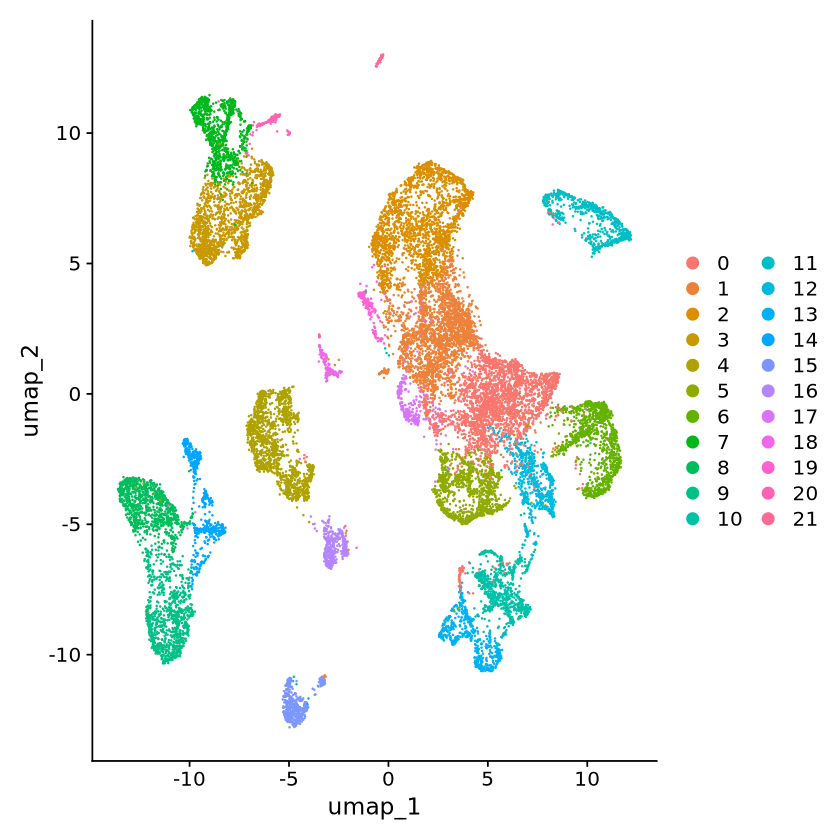

In [64]:
DimPlot(obj)

In [65]:
blueprint.ref <- celldex::BlueprintEncodeData()
monaco.ref <- celldex::MonacoImmuneData()

see ?celldex and browseVignettes('celldex') for documentation

loading from cache

see ?celldex and browseVignettes('celldex') for documentation

loading from cache

see ?celldex and browseVignettes('celldex') for documentation

loading from cache

see ?celldex and browseVignettes('celldex') for documentation

loading from cache



In [ ]:
sce <- LayerData(obj)
blueprint.main <- SingleR(test = sce, assay.type.test = 1, ref = blueprint.ref, labels = blueprint.ref$label.main)
obj@meta.data$blueprint.main <- blueprint.main$pruned.labels
save(obj, file=file.path("object", "04.rda"))

In [76]:
load(file = file.path("object", "04.rda"))

In [77]:
table(obj@meta.data$blueprint.main)


       Adipocytes        Astrocytes           B-cells      CD4+ T-cells 
             1174                13               614               507 
     CD8+ T-cells      Chondrocytes                DC Endothelial cells 
              862                 6                72               743 
 Epithelial cells      Erythrocytes       Fibroblasts               HSC 
             9564                54               237               159 
    Keratinocytes       Macrophages   Mesangial cells         Monocytes 
                1               960              1888              1810 
         Myocytes           Neurons          NK cells   Skeletal muscle 
               36               235               709               165 
    Smooth muscle 
               12 

In [78]:
obj <- SetIdent(obj, value = "blueprint.main")
obj <- subset(obj, idents = c("Adipocytes", "Neurons", "HSC", "Neurons", "Skeletal muscle",
"Erythrocytes", "Myocytes"), invert = TRUE)

In [79]:
obj <- SetIdent(obj, value = "blueprint.main")
remove_low_count_cells <- function(seurat_obj, metadata_column, threshold = 20) {

  seurat_obj <- SetIdent(seurat_obj, value = metadata_column)

  total_counts <- table(seurat_obj@meta.data[[metadata_column]])

  low_count_cells <- names(total_counts[total_counts < threshold])

  seurat_obj <- subset(seurat_obj, idents = low_count_cells, invert = TRUE)

  return(seurat_obj)
}
obj <- remove_low_count_cells(seurat_obj = obj, metadata_column = "blueprint.main", threshold = 20)

In [80]:
table(obj@meta.data$blueprint.main)


          B-cells      CD4+ T-cells      CD8+ T-cells                DC 
              614               507               862                72 
Endothelial cells  Epithelial cells       Fibroblasts       Macrophages 
              743              9564               237               960 
  Mesangial cells         Monocytes          NK cells 
             1888              1810               709 

In [81]:
sce <- LayerData(obj)
monaco.fine <- SingleR(test = sce, assay.type.test = 1, ref = monaco.ref, labels = monaco.ref$label.fine)
obj@meta.data$monaco.fine <- monaco.fine$pruned.labels
save(obj, file=file.path('object', '05.rda'))

In [82]:
table(obj@meta.data$monaco.fine)


   Central memory CD8 T cells           Classical monocytes 
                           66                          1839 
  Effector memory CD8 T cells             Exhausted B cells 
                           79                            39 
    Follicular helper T cells        Intermediate monocytes 
                           93                          1510 
        Low-density basophils                    MAIT cells 
                           22                            78 
      Myeloid dendritic cells                 Naive B cells 
                         3937                            22 
            Naive CD4 T cells             Naive CD8 T cells 
                          122                            28 
         Natural killer cells       Non classical monocytes 
                          243                           209 
  Non-switched memory B cells            Non-Vd2 gd T cells 
                           67                           419 
                 Plasma

In [83]:
obj <- RunPCA(obj, npcs = 30, verbose = TRUE)
obj <- RunUMAP(obj, reduction = "pca", dims = 1:20)
obj <- FindNeighbors(obj, reduction = "pca", dims = 1:20)
obj <- FindClusters(obj, resolution = 0.5)
save(obj, file=file.path("object", "06.rda"))

PC_ 1 
Positive:  WFDC2, SPP1, DEFB1, FXYD2, IGFBP7, MT1G, UMOD, S100A2, FXYD4, ATP1B1 
	   CLU, MMP7, SLPI, AQP2, S100A6, SOD3, SLC12A1, CRYAB, CD24, PCSK1N 
	   MAL, PDZK1IP1, ATP1A1, PIGR, MT1H, KRT19, MALAT1, CXCL14, MUC1, GPX3 
Negative:  HLA-DRA, LYZ, HLA-DRB1, HLA-DPA1, HLA-DPB1, CD74, TYROBP, TMSB4X, AIF1, S100A4 
	   HLA-DQA1, FCER1G, HLA-DQB1, C1QA, FTL, LST1, CST3, S100A9, C1QB, CCL3 
	   CCL4, HLA-DRB5, HCST, NKG7, LGALS1, B2M, SRGN, C1QC, CTSS, FOS 
PC_ 2 
Positive:  MALAT1, WFDC2, DEFB1, FXYD4, SPP1, AQP2, S100A2, UMOD, S100A6, SLPI 
	   NKG7, IGFBP7, SLC12A1, SOD3, MMP7, B2M, TMSB4X, ATP1B1, CCL4, S100A4 
	   CCL5, MUC1, MAL, GNLY, ITM2C, KRT19, ATP1A1, CLU, HLA-B, CD9 
Negative:  MT1G, FTL, ALDOB, MT1H, GPX3, MT1X, CRYAB, MIOX, GATM, APOE 
	   MT2A, FABP1, PDZK1IP1, GSTA1, MT1E, FTH1, MT1F, HPD, PCK1, GSTA2 
	   RBP5, NAT8, FXYD2, LGALS2, ECHS1, TXN, CYB5A, ASS1, C11orf54, S100A1 
PC_ 3 
Positive:  WFDC2, HLA-DRA, SPP1, LYZ, HLA-DRB1, DEFB1, HLA-DPA1, HLA-DPB1, CD74, CS

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 18020
Number of edges: 567787

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9332
Number of communities: 22
Elapsed time: 1 seconds


In [102]:
load( file=file.path("object", "06.rda"))

In [103]:
# print(head(obj))

In [104]:
# Clean up metadata
obj@meta.data$Stim <- obj@meta.data$condition.long
obj@meta.data$Sex <- obj@meta.data$sex
obj@meta.data$Race <- obj@meta.data$race
obj@meta.data$CellTypes <- obj@meta.data$subclass.full

# Columns of interest
columns_to_keep <-  c('orig.ident', 'nCount_RNA', 'Stim', 'Sex', 'Race', 'CellTypes', 'blueprint.main', 'monaco.fine')
obj@meta.data <- obj@meta.data[, columns_to_keep, drop = FALSE]

In [105]:
seu =  obj
scConf = createConfig(seu)
makeShinyApp(seu, scConf,
             gene.mapping = TRUE,
             shiny.title = "Kidney Health and Injured Cell Stats scRNAseq",
             shiny.dir = "kidney_health_injured_scRNAseq_GSE182270/",
             gex.assay = "SCT",
             default.multigene = c('LILRB1', 'PDCD1')) 
system("R -e \"shiny::runApp('kidney_health_injured_scRNAseq_GSE182270')\"")